In [1]:
# Load necessary libraries
library(ADM)
source("./functions.R")

Loading required package: Matrix


Attaching package: ‘uwot’


The following object is masked from ‘package:umap’:

    umap


Loading required package: MASS

Loading required package: survival


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:igraph’:

    crossing


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The follo

In [2]:
# Set dataset name
dataset = "Spleen"  # Options: Gutierrez, Oihane, Quake, Brain5k, mir, Spleen, metabolism, gene

# Load data
dataload = dataloader(dataset)
dat = dataload$dat
info = dataload$info
k = length(unique(info))
label_mapping <- get_mapping(dataset)
print("load data successfully!")

# Execute candidate visualization methods
candidate.out = candidate.visual(dat, dim = 3, method=c("PCA", "MDS", "iMDS", "Sammon", "HLLE", "Isomap", 
                                                  "kPCA", "LEIM", "UMAP", "tSNE","PHATE","KEF"),tsne.perplexity = c(10, 30))

print("Indivadual methods completed!!")
# Extract results
e<-candidate.out[[1]]  # Visualization results
names_list = candidate.out[[2]]  # List of method names

[1] "load data successfully!"
[1] 2568   21
[1] "PCA calculating..."
[1] "MDS calculating..."
[1] "iMDS calculating..."
initial  value 19.528147 
iter   5 value 14.568780
final  value 13.668175 
converged
[1] "Sammon calculating..."
Initial stress        : 0.13254
stress after   1 iters: 0.12905
[1] "HLLE calculating..."


2024-10-16 19:51:42.521552: Finding nearest neighbors

2024-10-16 19:51:42.908306: Calculating Hessian



'as(<dsCMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "generalMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").

2024-10-16 19:51:43.95458: Embedding

Eigenvalues: 2.458597e-02 2.045357e-02 1.284001e-02 1.528878e-16

2024-10-16 19:51:45.186599: DONE



[1] "Isomap calculating..."


2024-10-16 19:51:45.219: Isomap START

2024-10-16 19:51:45.222176: constructing knn graph

2024-10-16 19:51:45.654394: calculating geodesic distances

2024-10-16 19:51:49.3411: Classical Scaling



[1] "kPCA calculating..."


2024-10-16 19:51:49.456294: Calculating kernel PCA

2024-10-16 19:51:55.469345: Trying to calculate reverse

2024-10-16 19:52:04.42179: DONE



[1] "kPCA calculating..."


2024-10-16 19:52:04.431784: Calculating kernel PCA

2024-10-16 19:52:09.817488: Trying to calculate reverse

2024-10-16 19:52:18.590286: DONE



[1] "LEIM calculating..."


2024-10-16 19:52:18.601399: Creating weight matrix

2024-10-16 19:52:19.129646: Eigenvalue decomposition

Eigenvalues: 1.461195e-01 7.750822e-02 4.271266e-02 8.110002e-17

2024-10-16 19:52:20.02368: DONE



[1] "UMAP calculating..."
[1] "UMAP calculating..."
[1] "tSNE calculating..."
[1] "tSNE calculating..."
[1] "PHATE calculating..."
[1] "PHATE calculating..."
[1] "KEF calculating..."
NULL
[1] "Indivadual methods completed!!"


In [3]:
# set.seed(2024)
# Execute meta-spec visualization
ensemble.out = ensemble.viz(e, names(e))
print("meta-spec completed!!")

[1] "1000 samples done!"
[1] "2000 samples done!"
[1] "meta-spec completed!!"


In [4]:
# Execute ADM method
adm.out = adm(e,distr.template = "combine")
print("ADM completed!!")

[1] "working on ADM..."


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Buildi

[1] "ADM completed!!"


In [5]:
# Define color list for visualization
color_list =c("#FB6A4A","#54278F","#006635","#3182BD","#DE2D26","#72A34F","#5D7AD3", "#756BB1","#FCAE91","#fe87ac","#AFABAB","#67A9CF","#CBC9E2","#4d982e","#E6873E","#545454","#aa3474","#ee8c7d","#2e5fa1","#FDD0A3","#C22F2F","#036f73")

# Process and visualize meta-method results
result = process_and_visualize_meta_methods(adm.out, ensemble.out,info, k, color_list)

[1] "Running R version:4.3.1"
****** meta-spec ******
        ARI       NMI
1 0.3498501 0.4320968
****** ADM ******
        ARI       NMI
1 0.4062976 0.4931949


In [6]:
result$ARI_list

[[1]]
        ARI       NMI
1 0.3498501 0.4320968

[[2]]
        ARI       NMI
1 0.4062976 0.4931949

[[1]]

[[2]]
NULL

[[3]]


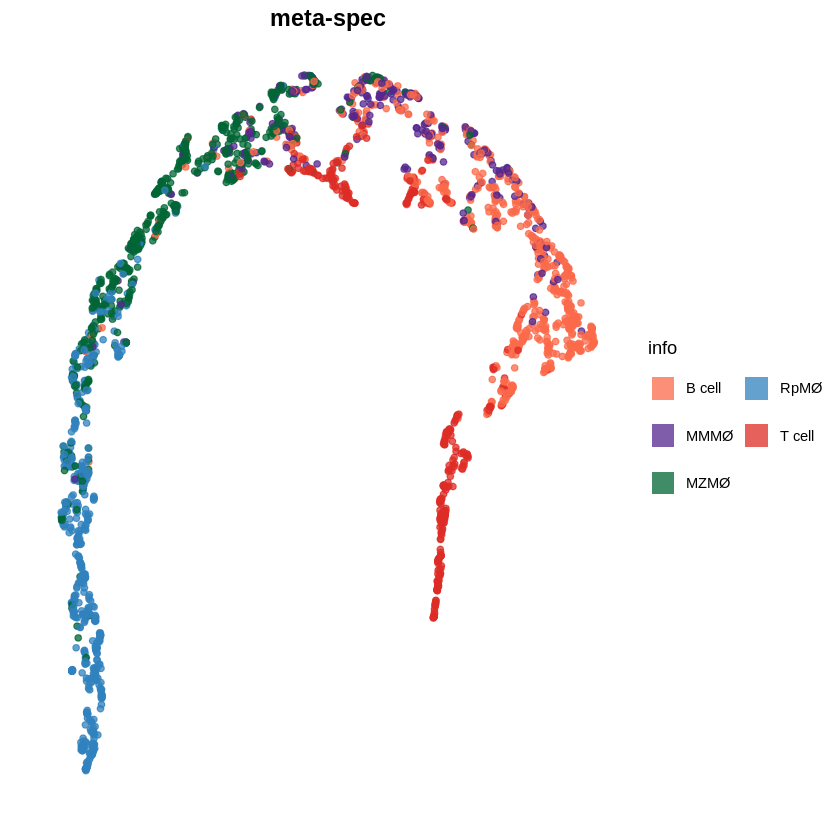

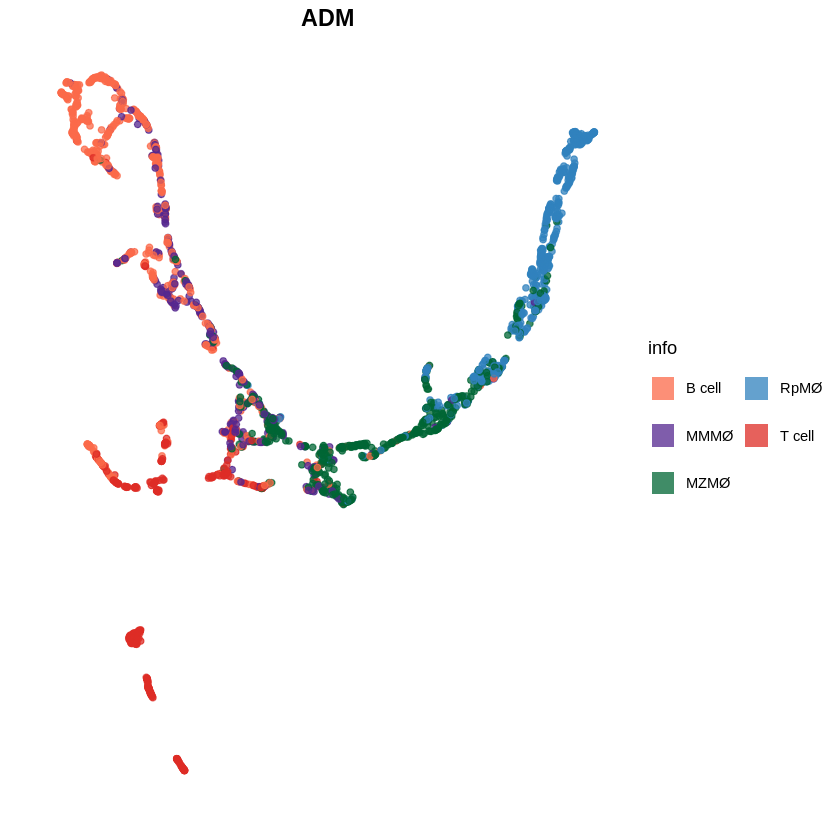

In [7]:
result$plot

****** PCA ******
        ARI       NMI
1 0.4134289 0.4853337
Average Silhouette Width: 0.4046565 

****** MDS ******
        ARI       NMI
1 0.4480159 0.4973028
Average Silhouette Width: 0.3501683 



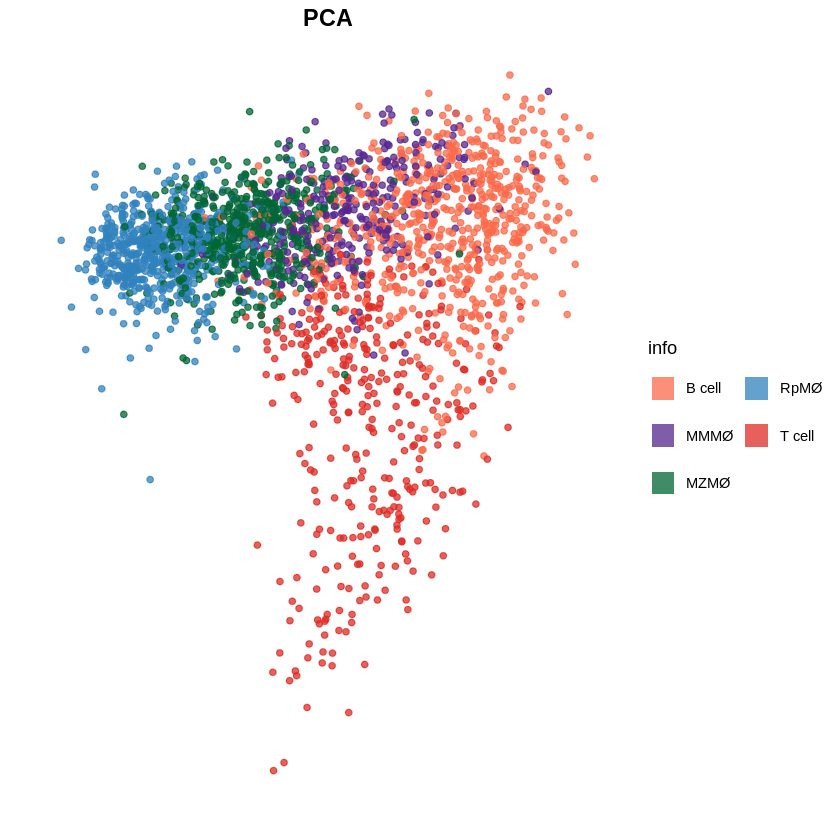

****** iMDS ******
        ARI       NMI
1 0.4353399 0.4871544
Average Silhouette Width: 0.3049305 



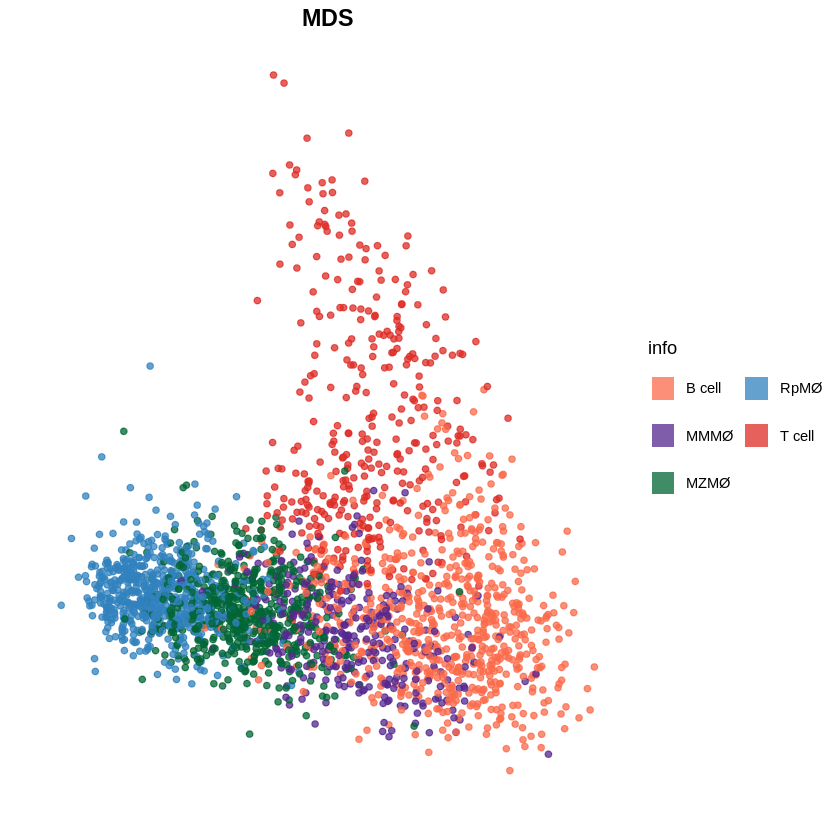

****** Sammon ******
        ARI       NMI
1 0.4472136 0.4956666
Average Silhouette Width: 0.3502772 



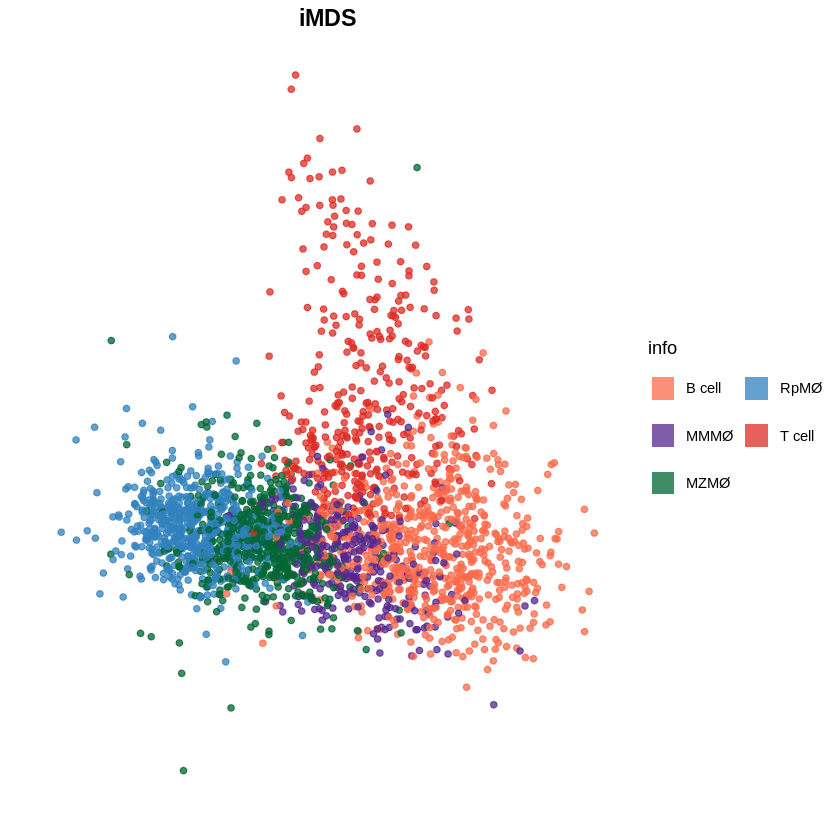

****** HLLE ******
           ARI         NMI
1 0.0003184602 0.002055953
Average Silhouette Width: 0.97432 



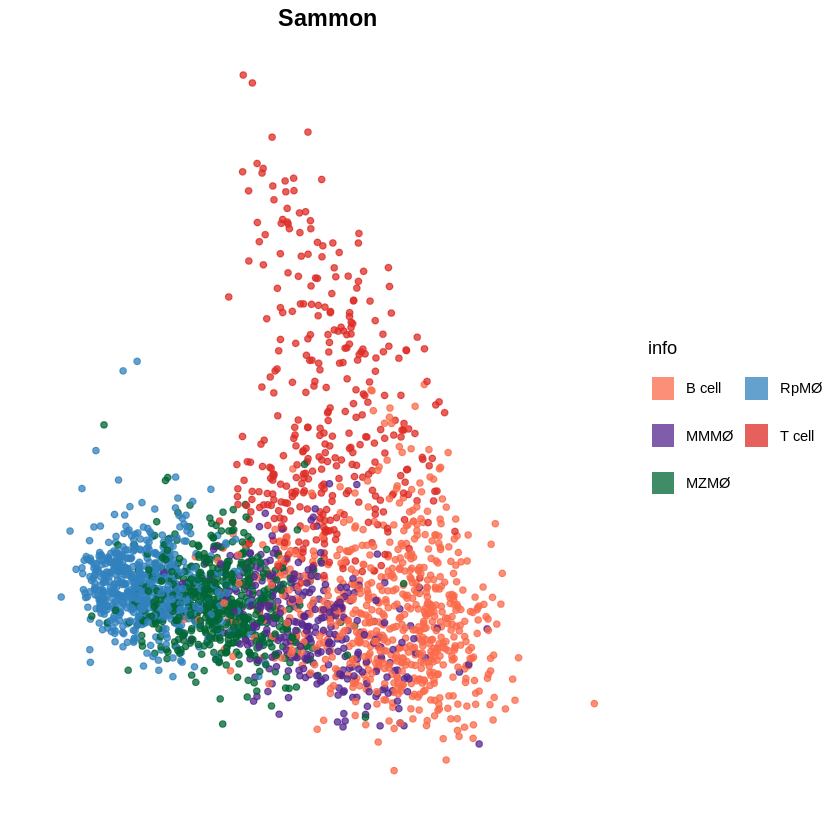

****** Isomap ******
        ARI      NMI
1 0.4624312 0.500819
Average Silhouette Width: 0.3464599 



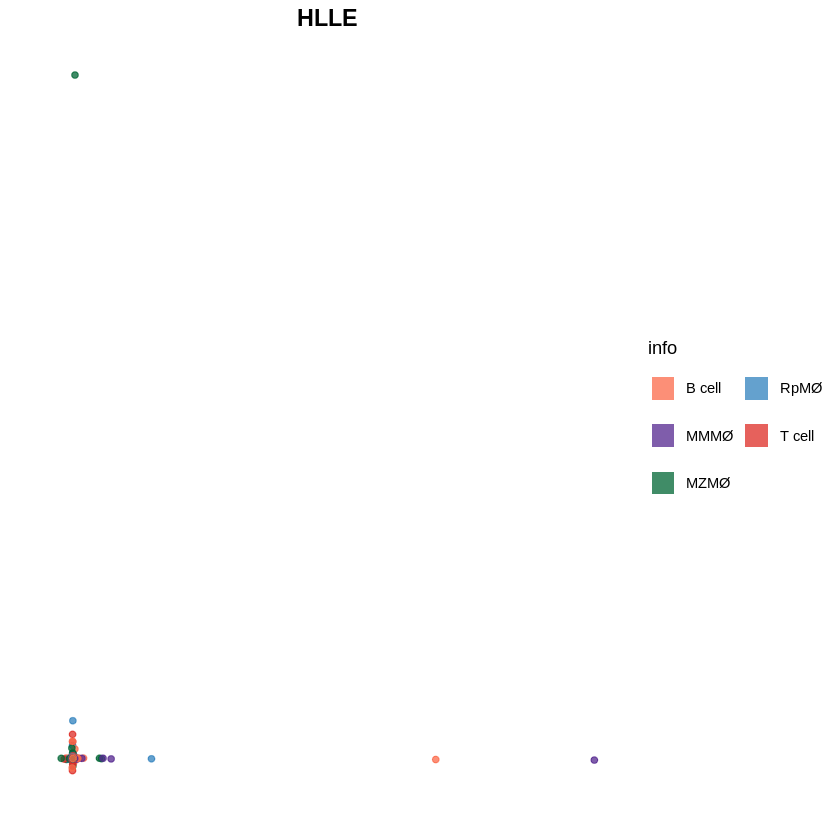

****** kPCA1 ******
        ARI       NMI
1 0.4499149 0.4986206
Average Silhouette Width: 0.3551378 



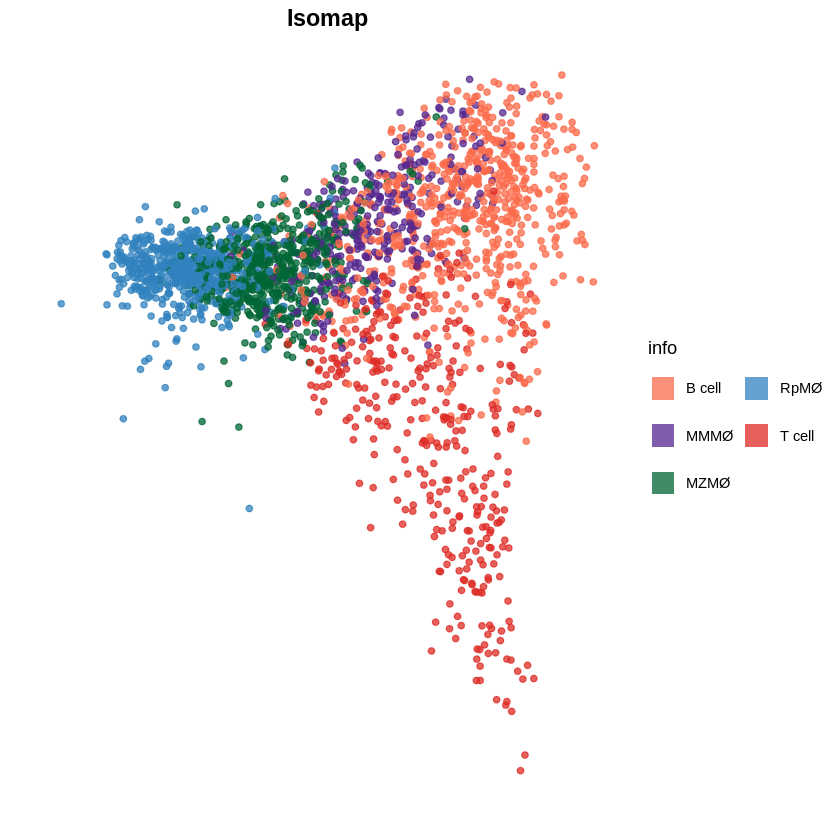

****** kPCA2 ******
        ARI       NMI
1 0.4490132 0.4974328
Average Silhouette Width: 0.3596454 



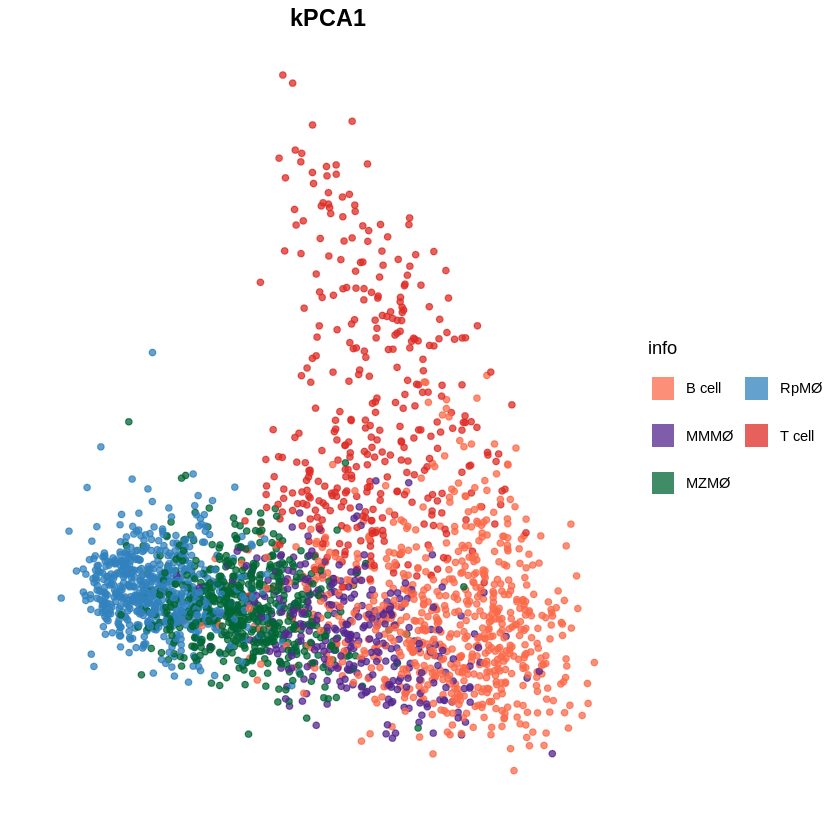

****** LEIM ******
       ARI       NMI
1 0.409589 0.4683555
Average Silhouette Width: 0.4922609 



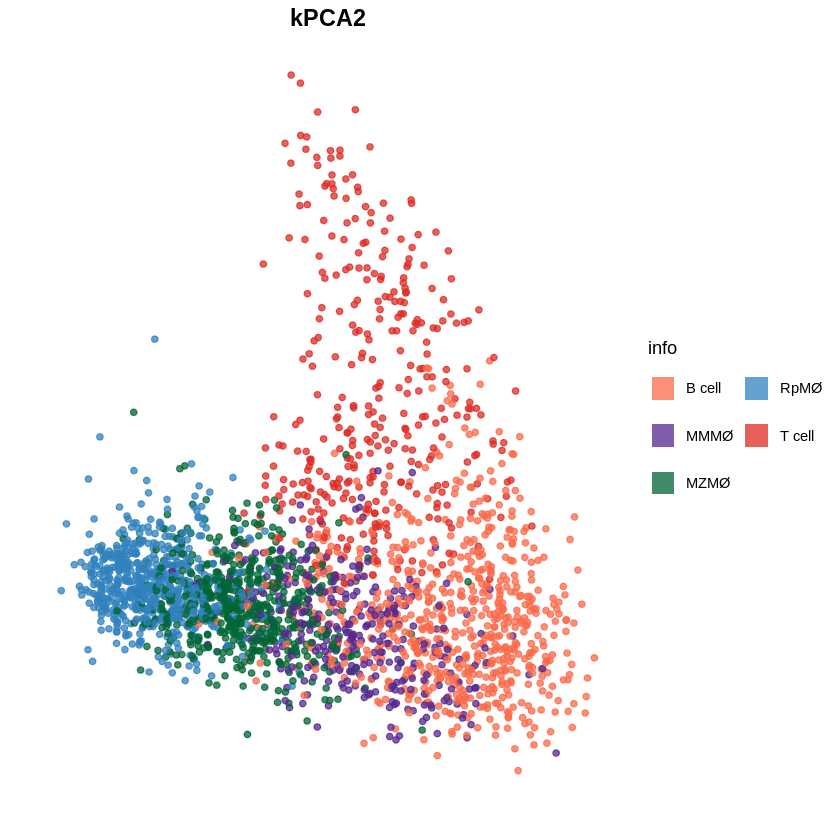

****** UMAP1 ******
        ARI       NMI
1 0.4697822 0.4893284
Average Silhouette Width: 0.449071 



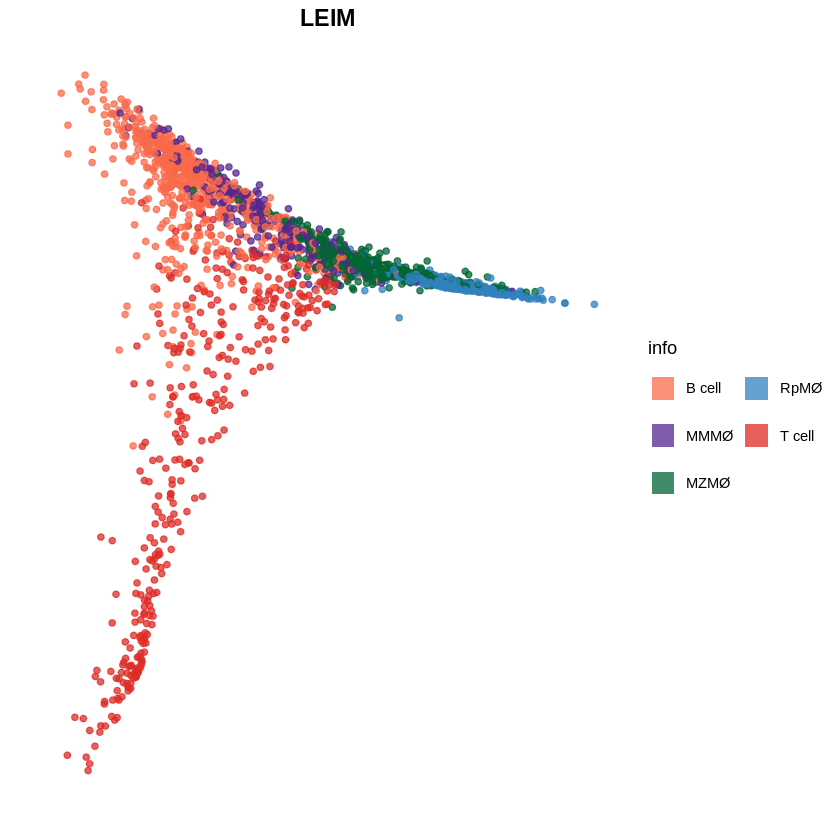

****** UMAP2 ******
        ARI       NMI
1 0.4689841 0.4909744
Average Silhouette Width: 0.4552913 



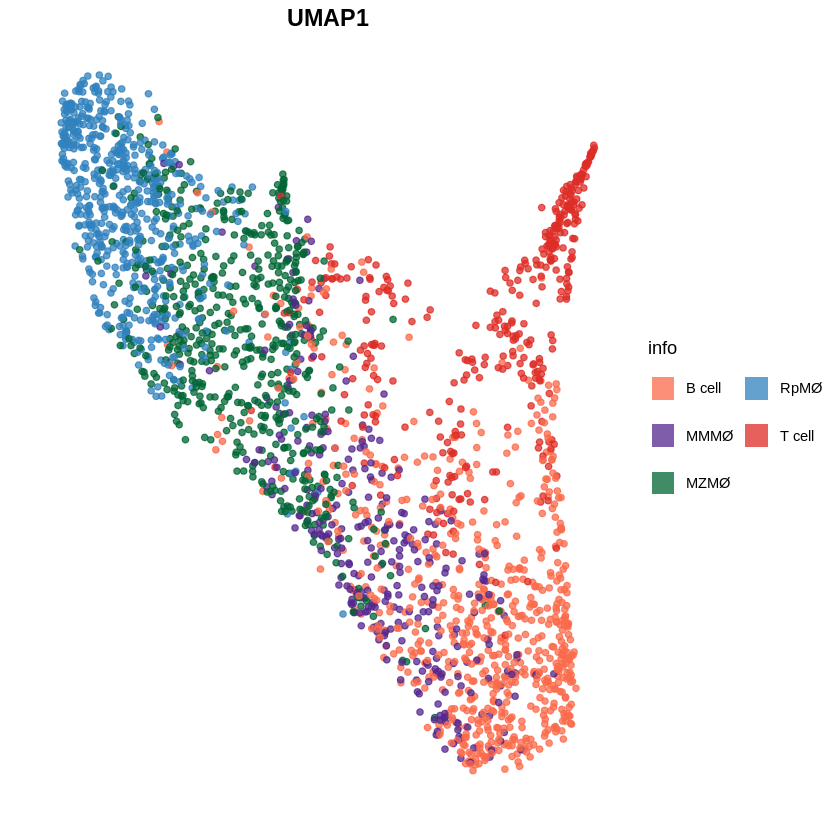

****** tSNE1 ******
        ARI       NMI
1 0.4252137 0.4486099
Average Silhouette Width: 0.3687113 



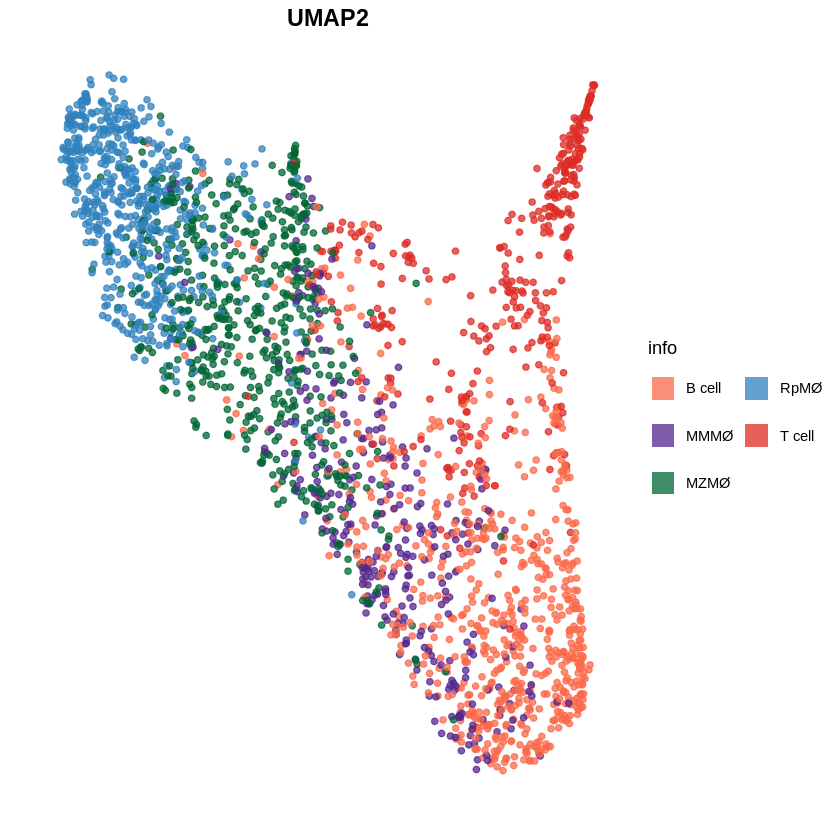

****** tSNE2 ******
        ARI       NMI
1 0.4398966 0.4707426
Average Silhouette Width: 0.3815028 



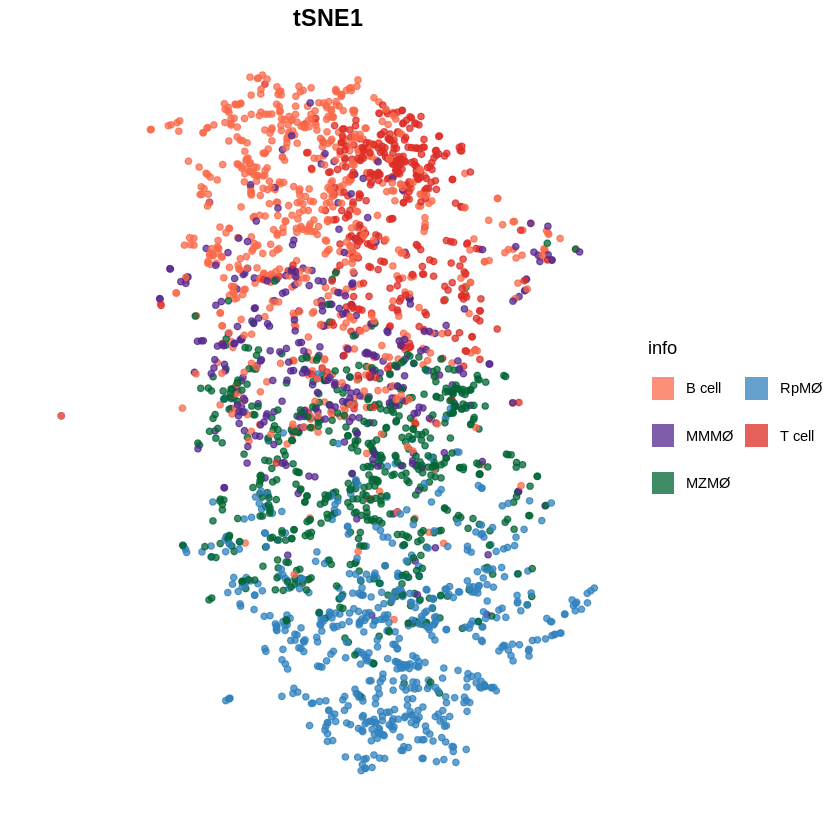

****** PHATE1 ******
        ARI       NMI
1 0.4569591 0.4894856
Average Silhouette Width: 0.5359762 



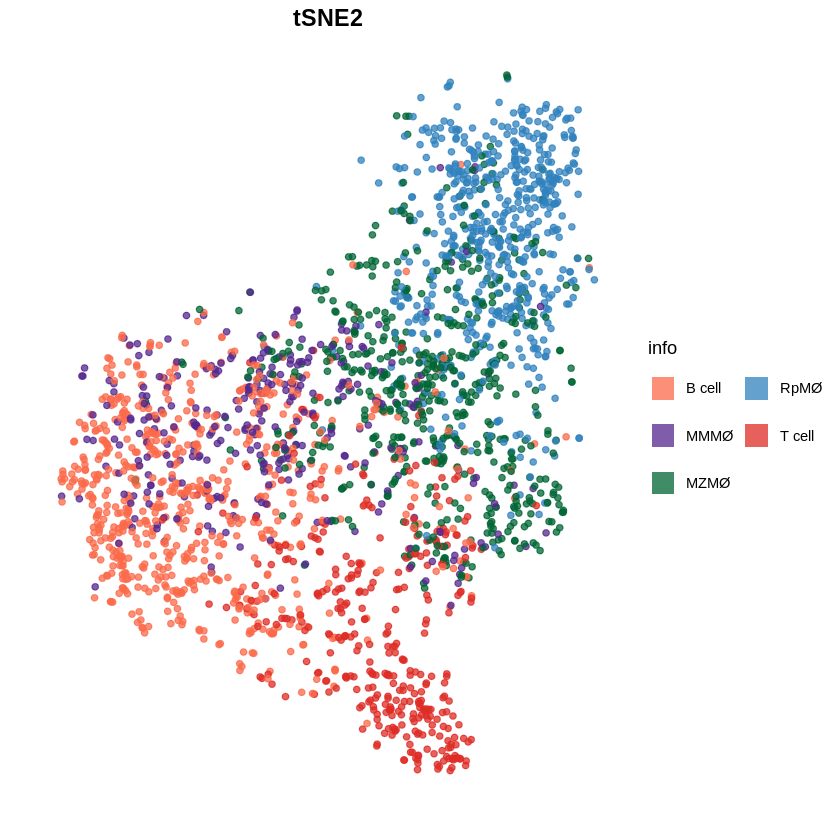

****** PHATE2 ******
        ARI       NMI
1 0.4006147 0.4361046
Average Silhouette Width: 0.5141616 



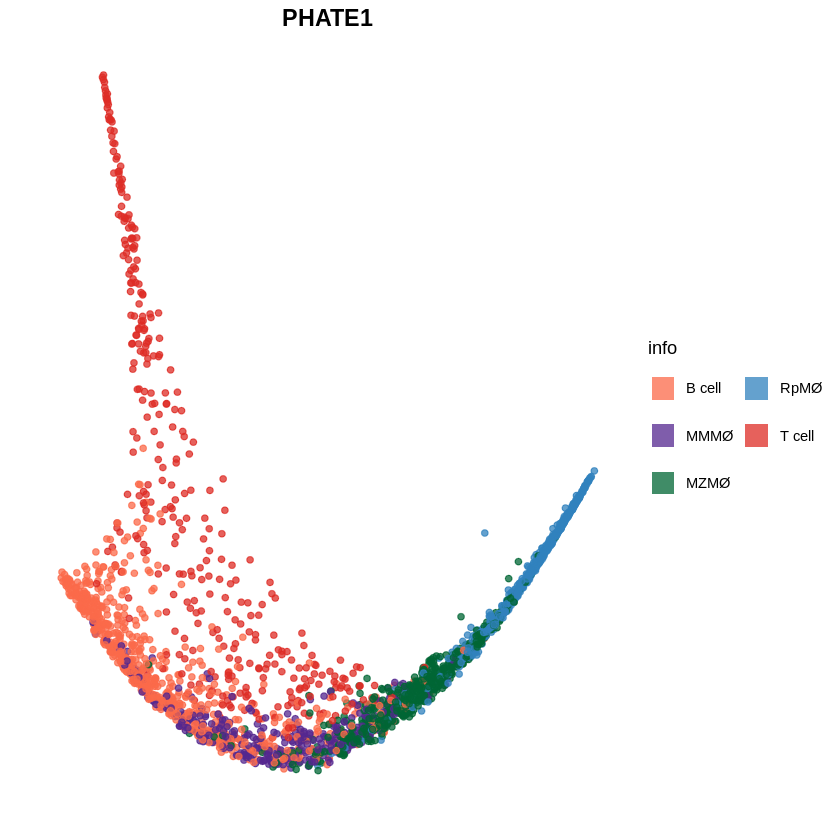

****** KEF ******
        ARI       NMI
1 0.4791489 0.5076074
Average Silhouette Width: 0.4742789 



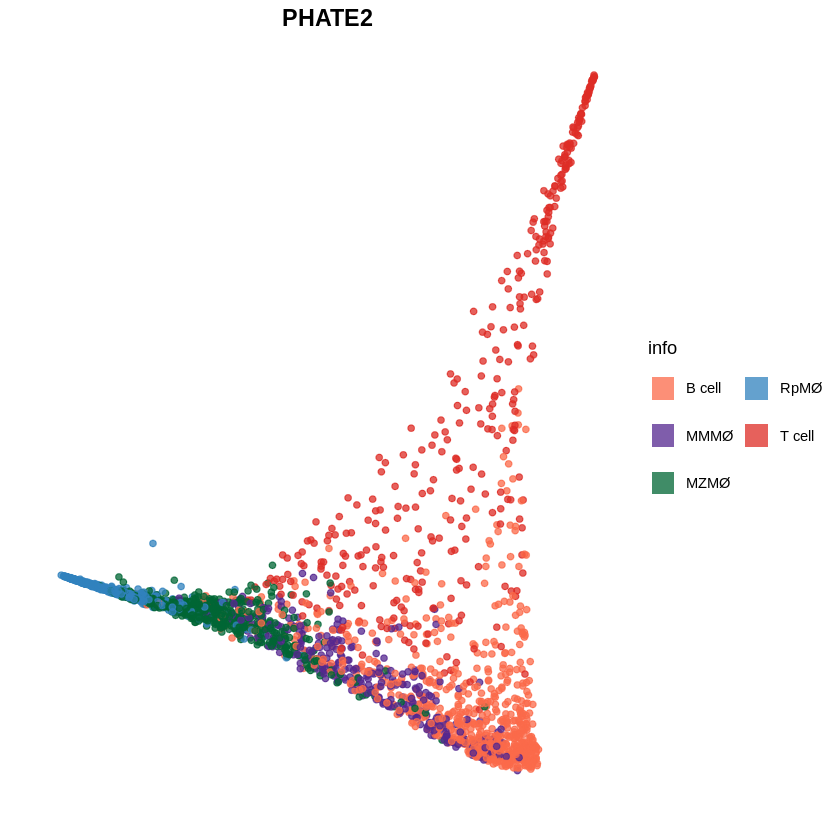

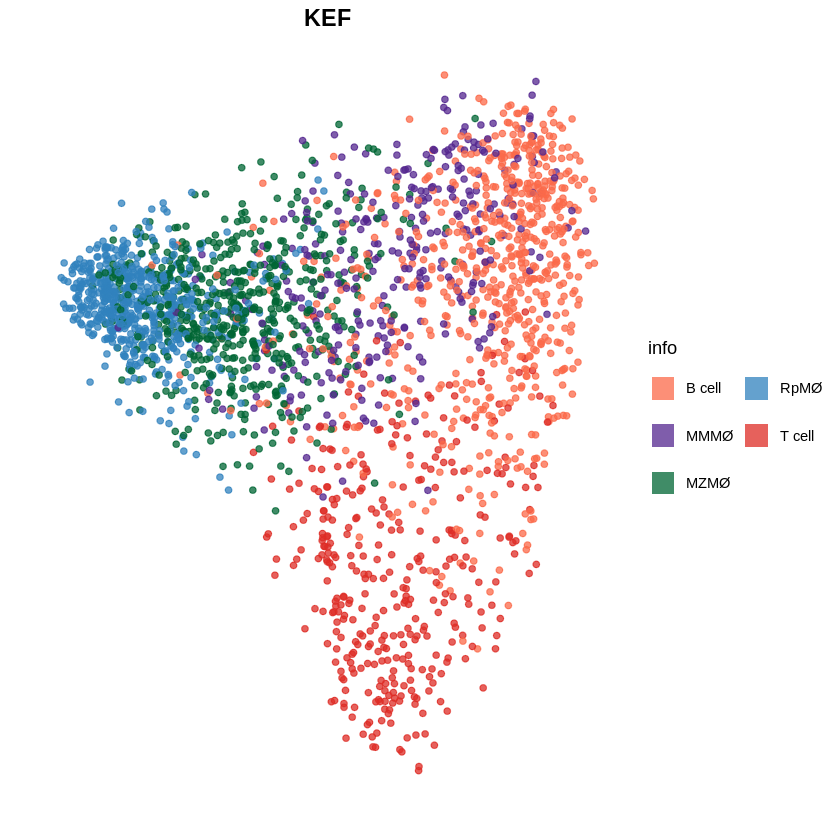

In [8]:
# Visualize individual method results
ind_result = visualize_individual_methods(e, names_list, info, color_list, k)

$plot

$ari
[1] 0.4134289

$nmi
[1] 0.4853337

$silhouette
[1] 0.4046565


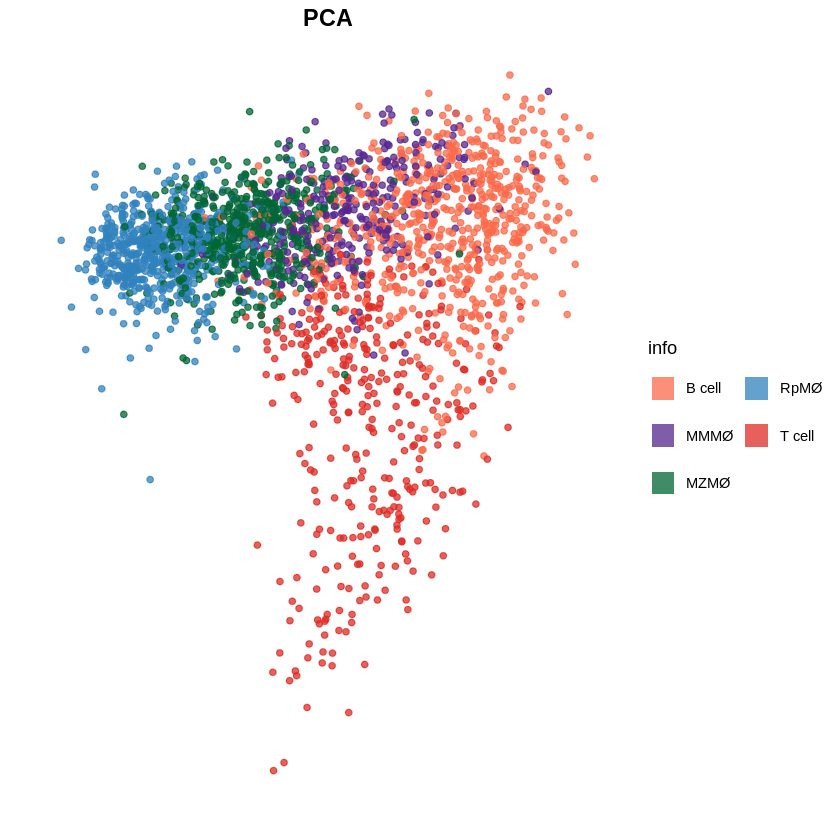

In [9]:
# View results
# Use the following commands to view numerical results and plots for each method:
# ind_result[[1]]$plot  # Plot
# ind_result[[1]]$ari   # ARI value
# ind_result[[1]]$nmi   # NMI value
# ind_result[[1]]$silhouette  # Silhouette coefficient

ind_result[[1]]